# Churn's Clients Analysis

# Import nessecary modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# Load Data

In [3]:
data = pd.read_csv('churn.csv')

# Dataset structure investigation

In [4]:
data.shape

(7043, 21)

In [5]:
# We have 7043 examples and 21 colums

In [6]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
data.columns.to_series().groupby(data.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges'], object: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']}

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
data.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [13]:
data.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# Data Cleaning

# Set lower case to column's names

In [14]:
data = data.rename(columns = str.lower)
data.head(5)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Convert churn column to interger data type

In [15]:
data.churn = (data.churn == 'Yes').astype('int')
data.head(5)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [16]:
data.tenure = data.tenure.astype(int)
data.monthlycharges = data.monthlycharges.astype(float)

In [17]:
data.loc[(data.tenure == 0), ['tenure']]

,tenure
488,0
753,0
936,0
1082,0
1340,0
3331,0
3826,0
4380,0
5218,0
6670,0


In [18]:
tenure_avg = round(data.tenure.mean(), 2)
data.loc[(data.tenure == 0), ['tenure']] = tenure_avg

In [19]:
data.loc[(data.tenure == 0), ['tenure']]

,tenure


In [20]:
data.loc[(data.monthlycharges == 0), ['monthlycharges']]

,monthlycharges


In [21]:
#Set missing data to 0 in column 'totalcharges'
data.loc[(data.totalcharges.str.contains('^\s+$')), 'totalcharges'] = '0'

In [22]:
data.totalcharges = data.totalcharges.astype(float)

In [23]:
# Calculate missing values
data.loc[(data.totalcharges == 0), ['totalcharges']] = data.tenure * data.monthlycharges

In [24]:
data.seniorcitizen = data.seniorcitizen.astype(int)

In [25]:
# Clean contract column
data.contract = data.contract.str.replace('One year', 'One-year')
data.contract = data.contract.str.replace('Two year', 'Two-year')

In [26]:
# Clean PaymentMethod
data.loc[(data.paymentmethod == "Bank transfer (automatic)"), ['paymentmethod']] = 'Bank-transfer'
data.loc[(data.paymentmethod == "Credit card (automatic)"), ['paymentmethod']] = 'Credit-card'
data.loc[(data.paymentmethod == "Electronic check"), ['paymentmethod']] = 'Electronic-check'
data.loc[(data.paymentmethod == "Mailed check"), ['paymentmethod']] = 'Mailed-check'

In [27]:
data.dtypes

customerid           object
gender               object
seniorcitizen         int32
partner              object
dependents           object
tenure              float64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int32
dtype: object

# Check missing values

In [28]:
data.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [29]:
data.isnull().mean()

customerid          0.0
gender              0.0
seniorcitizen       0.0
partner             0.0
dependents          0.0
tenure              0.0
phoneservice        0.0
multiplelines       0.0
internetservice     0.0
onlinesecurity      0.0
onlinebackup        0.0
deviceprotection    0.0
techsupport         0.0
streamingtv         0.0
streamingmovies     0.0
contract            0.0
paperlessbilling    0.0
paymentmethod       0.0
monthlycharges      0.0
totalcharges        0.0
churn               0.0
dtype: float64

In [30]:
data.isna().any()

customerid          False
gender              False
seniorcitizen       False
partner             False
dependents          False
tenure              False
phoneservice        False
multiplelines       False
internetservice     False
onlinesecurity      False
onlinebackup        False
deviceprotection    False
techsupport         False
streamingtv         False
streamingmovies     False
contract            False
paperlessbilling    False
paymentmethod       False
monthlycharges      False
totalcharges        False
churn               False
dtype: bool

# Data Analytics

0    5174
1    1869
Name: churn, dtype: int64

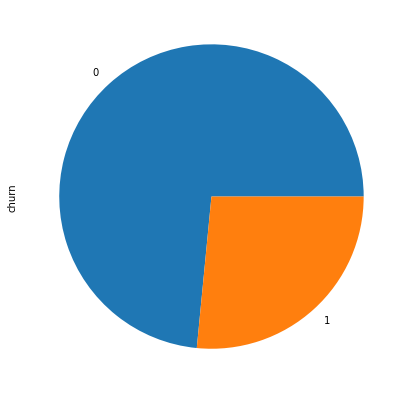

In [31]:
data.churn.value_counts().plot(kind='pie', figsize = (12,7));
data.churn.value_counts()


In [32]:
data.groupby('seniorcitizen').agg({'churn':['count', sum, 'mean']})

churn                
              count   sum      mean
seniorcitizen                      
0              5901  1393  0.236062
1              1142   476  0.416813

In [33]:
#  Senior Citizen and Churn
# Senior Citizen churn more than the rest of other people

In [34]:
senior_distribution = data.seniorcitizen.value_counts(normalize=True).sort_index()
senior_distribution

0    0.837853
1    0.162147
Name: seniorcitizen, dtype: float64

In [35]:
senior_by_internet_rates = data.groupby('internetservice').seniorcitizen.mean()
senior_by_internet_rates

internetservice
DSL            0.106981
Fiber optic    0.268411
No             0.034076
Name: seniorcitizen, dtype: float64

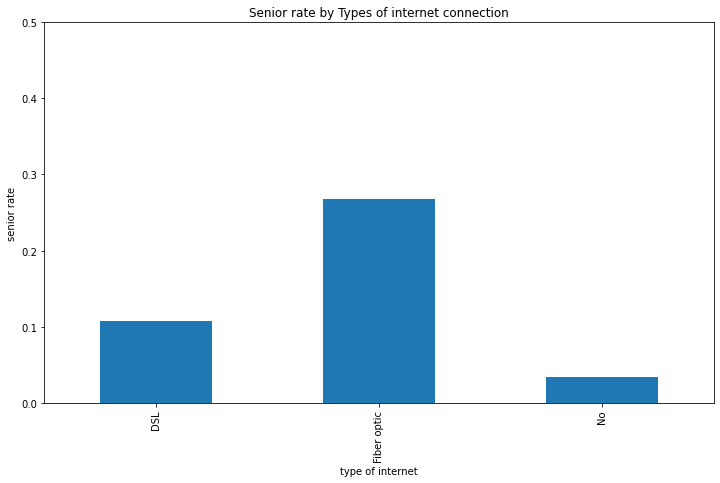

In [36]:
senior_by_internet_rates.plot(kind='bar', figsize = (12,7))
plt.xlabel('type of internet')
plt.ylabel('senior rate')
plt.ylim(0, 0.5)
plt.title('Senior rate by Types of internet connection');

In [37]:
# conclusion : Most seniorcitizen have internet subscriptions

In [38]:
senior_by_phone_rates = data.groupby('phoneservice').seniorcitizen.mean()
senior_by_phone_rates

phoneservice
No     0.152493
Yes    0.163182
Name: seniorcitizen, dtype: float64

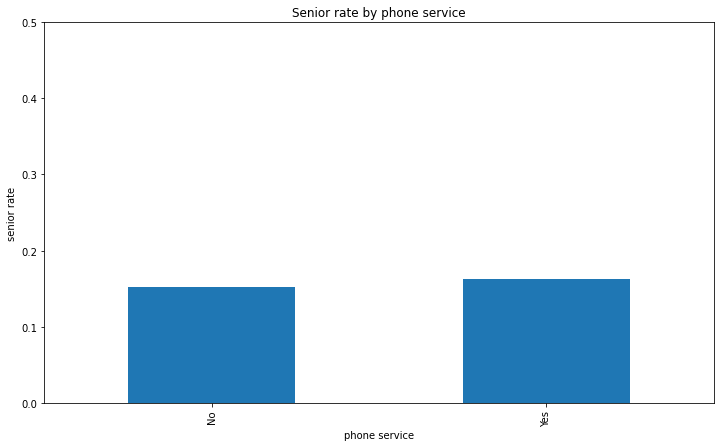

In [39]:
senior_by_phone_rates.plot(kind='bar', figsize = (12,7))
plt.xlabel('phone service')
plt.ylabel('senior rate')
plt.ylim(0, 0.5)
plt.title('Senior rate by phone service');

In [40]:
# phone service is not super popular with the seniorcitizen

In [41]:
senior_payment = data.groupby(['paymentmethod', 'seniorcitizen']).size().unstack()
senior_payment

seniorcitizen,0,1
paymentmethod,,
Bank-transfer,1311,233
Credit-card,1301,221
Electronic-check,1771,594
Mailed-check,1518,94


Text(0.5, 1.0, 'senior rate by Payment method')

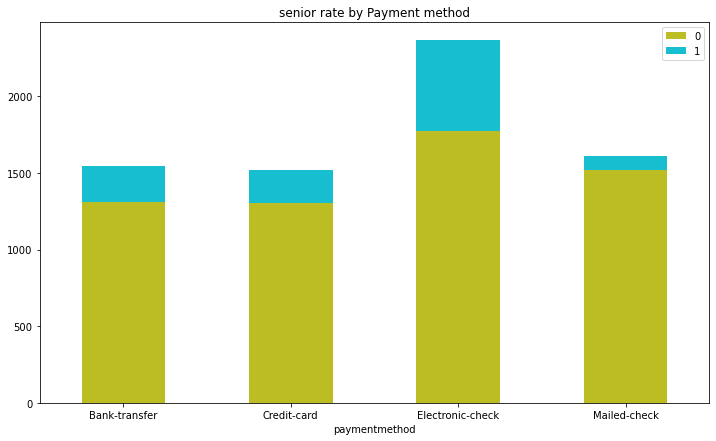

In [42]:
senior_payment.plot(kind='bar', stacked=True, rot = 0, figsize = (12,7), width = 0.5, color=['#bcbd22', '#17becf'])
plt.legend(['0', '1'])
plt.title('senior rate by Payment method')

In [43]:
# conclusion : the majority of the Senior citizen use electronic check. This majority is followed by the rest of the clients

In [44]:
data_paper = data.groupby(['paperlessbilling', 'seniorcitizen']).size().unstack()
data_paper 

seniorcitizen,0,1
paperlessbilling,,
No,2606,266
Yes,3295,876


Text(0.5, 1.0, 'Senior rate by paperlessbilling')

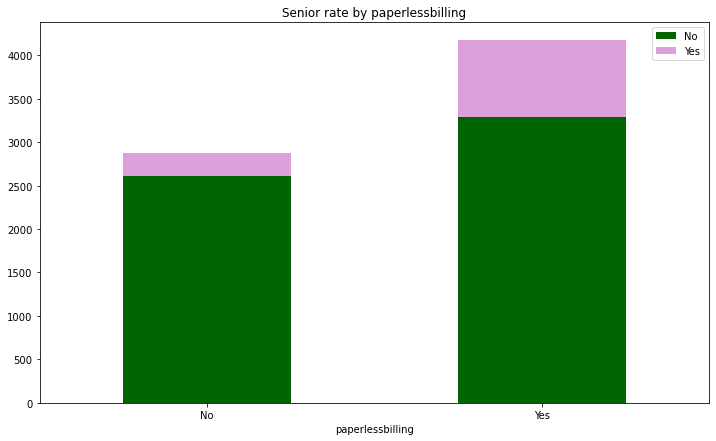

In [45]:
data_paper .plot(kind='bar', stacked=True, rot = 0, figsize = (12,7), width = 0.5, color=['#006400', '#DDa0DD'])
plt.legend(['No', 'Yes'])
plt.title('Senior rate by paperlessbilling')

In [46]:
# conclusion : the senior citizen appreciate receiving paper invoices

# Check customers churn by gender

In [47]:
data.gender = data.gender.str.lower()
data.gender.isnull().sum()
data.churn.isnull().sum()
data.groupby('gender').agg({'churn':['count', sum, 'mean']})

churn               
       count  sum      mean
gender                     
female  3488  939  0.269209
male    3555  930  0.261603

# Gender Distribution

In [56]:
d1 = data.groupby('gender').agg({'customerid':['count']})
d1

,customerid
,count
gender,
female,3488
male,3555


<AxesSubplot:title={'center':'The gender dustribution'}, xlabel='gender'>

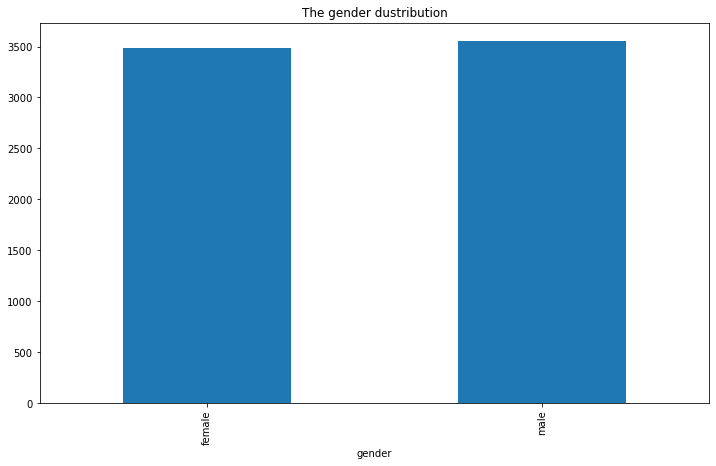

In [58]:
d1.plot.bar(title="The gender dustribution", legend=False, figsize = (12,7))

# Age Distribution

In [59]:
d1 = data.groupby('seniorcitizen').agg({'customerid':['count']})
d1

,customerid
,count
seniorcitizen,
0,5901
1,1142


<AxesSubplot:title={'center':'The seniorcitizen dustribution'}, xlabel='seniorcitizen'>

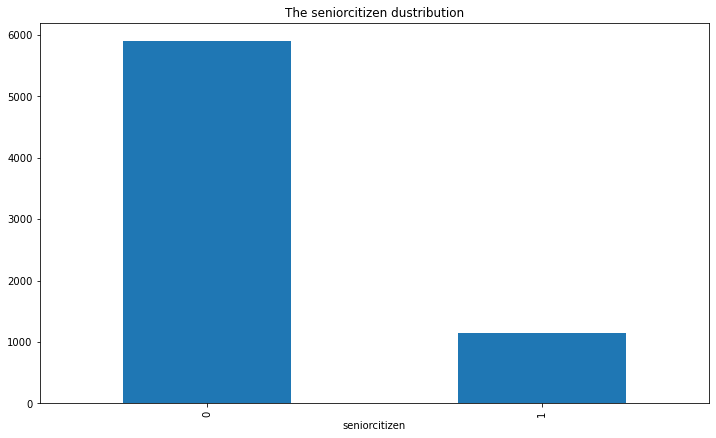

In [67]:
d1.plot.bar(title="The seniorcitizen dustribution", legend=False, figsize = (12,7))

In [47]:
data.groupby('gender').agg({'churn':[sum]})

,churn
,sum
gender,
female,939
male,930


<AxesSubplot:title={'center':"The gender dustribution of churn's customers"}, xlabel='gender'>

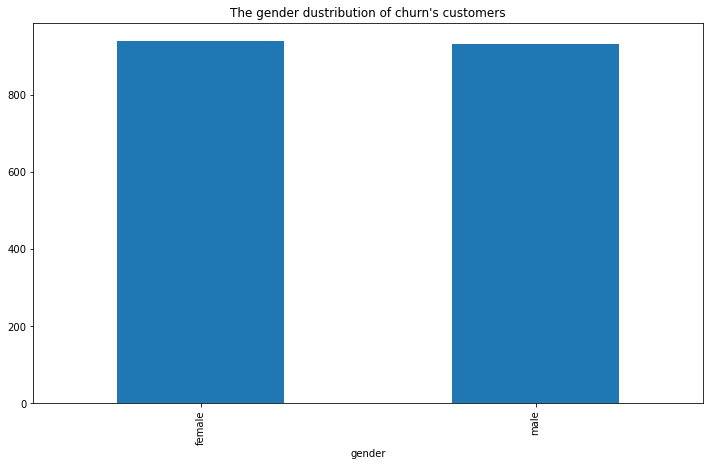

In [48]:
data.groupby('gender').agg({'churn':[sum]}).plot.bar(title="The gender dustribution of churn's customers", legend=False, figsize = (12,7))

In [49]:
# Conclusion: The client's gender doesn't have impact to churn clients

In [50]:
data.groupby(['gender', 'seniorcitizen']).agg({'churn':['count',sum,'mean']})

churn               
                     count  sum      mean
gender seniorcitizen                     
female 0              2920  699  0.239384
       1               568  240  0.422535
male   0              2981  694  0.232808
       1               574  236  0.411150

# Check service usage

In [51]:
data.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

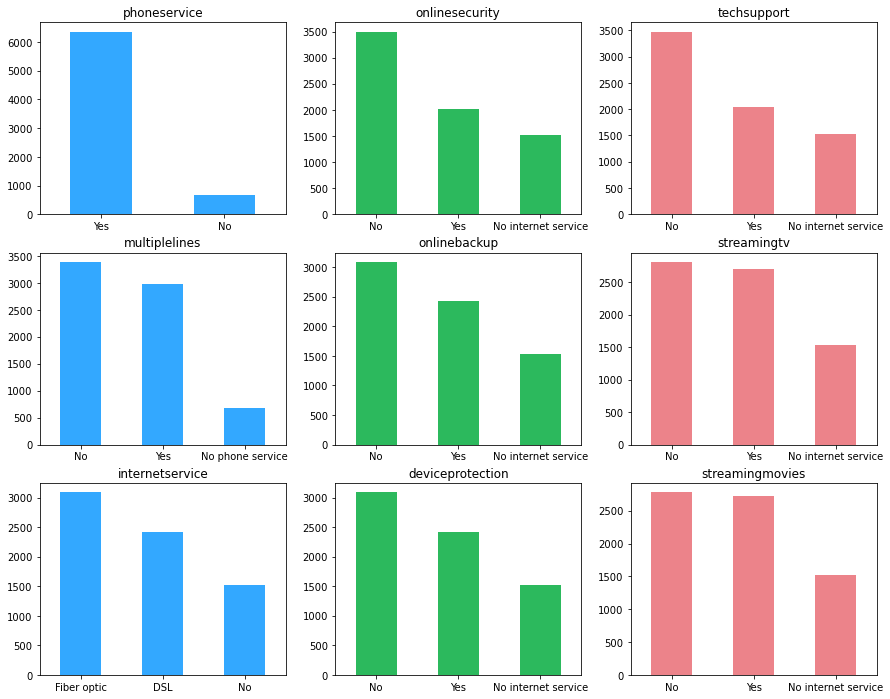

In [52]:
services = ['phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies']

fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 12))

for i, service in enumerate(services):
        if i < 3:
            data[service].value_counts().plot(kind = 'bar',ax=axes[i,0], rot = 0, color ='#33A8FF' ).set_title(service)
        elif i >= 3 and i < 6:
            data[service].value_counts().plot(kind = 'bar',ax=axes[i-3,1], rot = 0,color ='#2CB95D').set_title(service)
        else:
            data[service].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0, color = '#ec838a').set_title(service)
            

In [53]:
# Conclusions:
# 1. Most customers have Phone service
# 2. Most customers have internet connection through FC and DSL technologies 
# 3. Half of internet customers have a streaming TV service
# 4. Customers of Online Backup, Device Protection, Technical Support and Online Security services are a minority

# Churn rate by Contract type

In [54]:
data_ch = data.groupby(['contract', 'churn']).size().unstack()

In [55]:
data_ch.head(5)

churn,0,1
contract,,
Month-to-month,2220,1655
One-year,1307,166
Two-year,1647,48


Text(0.5, 1.0, 'Churn rate by Contract type')

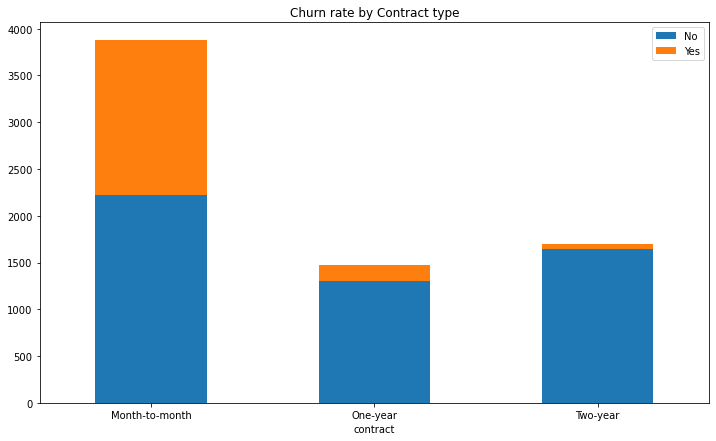

In [56]:
data_ch.plot(kind='bar', stacked=True, rot = 0, figsize = (12,7), width = 0.5)
plt.legend(['No', 'Yes'])
plt.title('Churn rate by Contract type')

In [57]:
#Conclusion:
# Customers with 'Month-to-month' contract type have a very high probability (more then 40%) to churn

# Overal churn rate

In [58]:
data_ch = data[['customerid', 'churn']]

In [59]:
d1 = (data_ch.groupby(['churn']).agg({'customerid':['count']}))*100/data_ch.customerid.count()

In [60]:
d1

,customerid
,count
churn,
0,73.463013
1,26.536987


Text(0.5, 1.0, 'Overal churn rate')

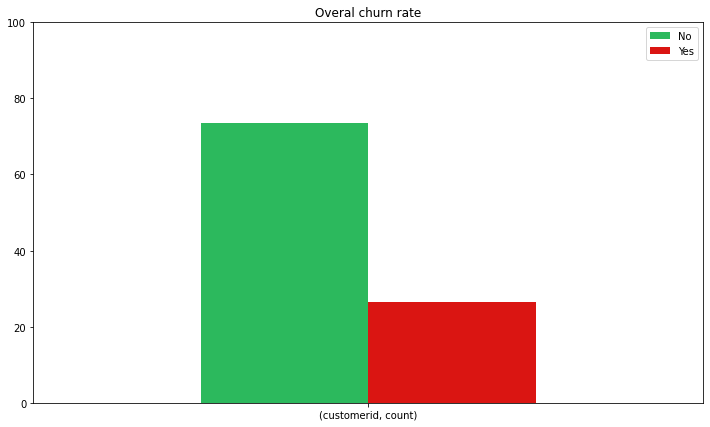

In [61]:
ax = d1.T.plot.bar(rot = 0, figsize = (12,7), width = 0.5, color=['#2CB95D', '#DA1512'])
ax.set_ylim(0, 100)
ax.legend(['No', 'Yes'])
plt.title('Overal churn rate')

In [62]:
# Conclusion: 73% of the customers are active and 27% has been churn the company

# Churn rate by Payment method

In [63]:
data.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [64]:
data_ch = data.groupby(['paymentmethod', 'churn']).size().unstack()

In [65]:
data_ch

churn,0,1
paymentmethod,,
Bank-transfer,1286,258
Credit-card,1290,232
Electronic-check,1294,1071
Mailed-check,1304,308


Text(0.5, 1.0, 'Churn rate by Payment method')

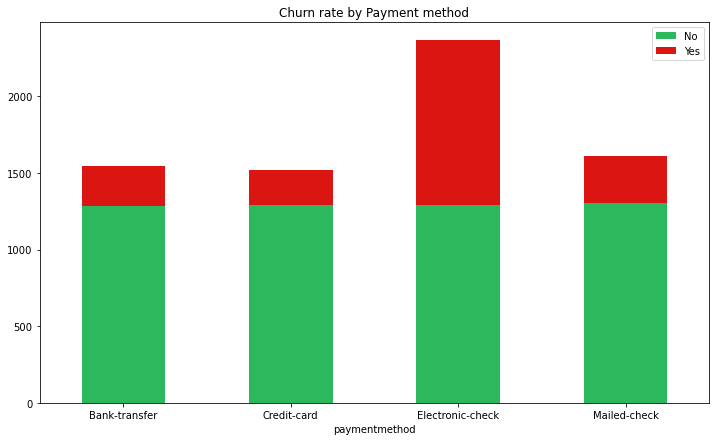

In [66]:
data_ch.plot(kind='bar', stacked=True, rot = 0, figsize = (12,7), width = 0.5, color=['#2CB95D', '#DA1512'])
plt.legend(['No', 'Yes'])
plt.title('Churn rate by Payment method')

In [67]:
# Conclusion: Customers who pay by credit card have the lowest churn rate.

In [68]:
data

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic-check,29.85,29.85,0
1,5575-GNVDE,male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One-year,No,Mailed-check,56.95,1889.50,0
2,3668-QPYBK,male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed-check,53.85,108.15,1
3,7795-CFOCW,male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One-year,No,Bank-transfer,42.30,1840.75,0
4,9237-HQITU,female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic-check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One-year,Yes,Mailed-check,84.80,1990.50,0
7039,2234-XADUH,female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One-year,Yes,Credit-card,103.20,7362.90,0
7040,4801-JZAZL,female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic-check,29.60,346.45,0
7041,8361-LTMKD,male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed-check,74.40,306.60,1


# Positive and negative correlation

Text(0.5, 1.0, 'Positive and negative correlation')

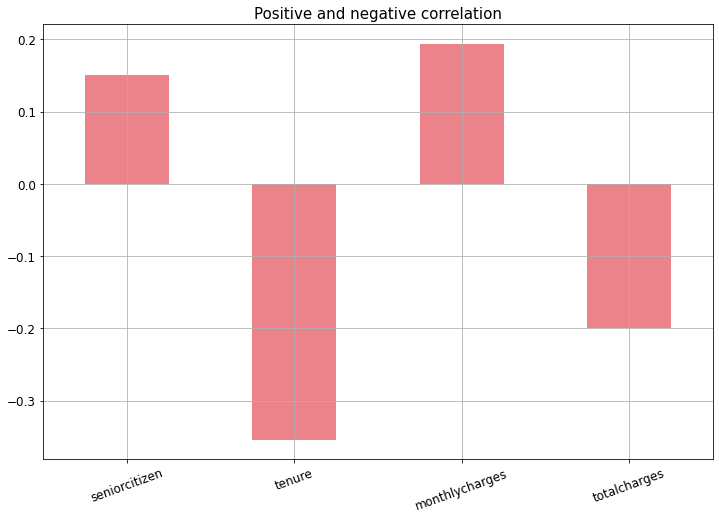

In [69]:
data1 = data[['seniorcitizen', 'partner', 'dependents',
               'tenure', 'phoneservice', 'paperlessbilling',
                'monthlycharges', 'totalcharges']]

corr = data1.corrwith(data.churn)
corr.plot.bar(figsize = (12, 8), fontsize = 12, color = '#ec838a', rot = 20, grid = True)
plt.title("Positive and negative correlation", fontsize = 15)

In [70]:
# Conclusion: Churn rate increase with monthly charges and age (senior citizen) and decrease with tenure and total charges

# Heatmap

<AxesSubplot:>

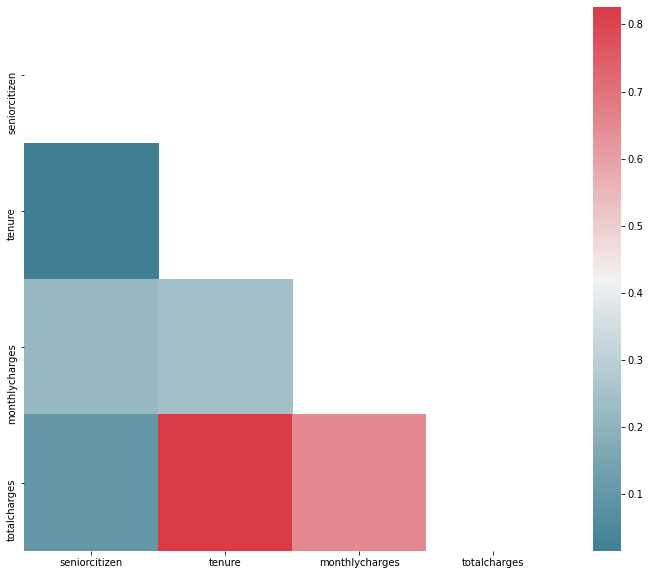

In [71]:
data1 = data[['seniorcitizen', 'partner', 'dependents',
               'tenure', 'phoneservice', 'paperlessbilling',
                'monthlycharges', 'totalcharges']]

corr = data1.corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap)

# Prediction

In [72]:
a = np.arange(1,7044)
data.insert(0, 'New_customerid', a)

In [73]:
data = data.drop(['customerid'], axis=1)

In [74]:
data = pd.get_dummies(data)

In [75]:
data

,New_customerid,seniorcitizen,tenure,monthlycharges,totalcharges,churn,gender_female,gender_male,partner_No,partner_Yes,...,streamingmovies_Yes,contract_Month-to-month,contract_One-year,contract_Two-year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank-transfer,paymentmethod_Credit-card,paymentmethod_Electronic-check,paymentmethod_Mailed-check
0,1,0,1.0,29.85,29.85,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,2,0,34.0,56.95,1889.50,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
2,3,0,2.0,53.85,108.15,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
3,4,0,45.0,42.30,1840.75,0,0,1,1,0,...,0,0,1,0,1,0,1,0,0,0
4,5,0,2.0,70.70,151.65,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7039,0,24.0,84.80,1990.50,0,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
7039,7040,0,72.0,103.20,7362.90,0,1,0,0,1,...,1,0,1,0,0,1,0,1,0,0
7040,7041,0,11.0,29.60,346.45,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
7041,7042,1,4.0,74.40,306.60,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1


In [76]:
data = data.astype(float)

In [77]:
data.isna().sum()

New_customerid                          0
seniorcitizen                           0
tenure                                  0
monthlycharges                          0
totalcharges                            0
churn                                   0
gender_female                           0
gender_male                             0
partner_No                              0
partner_Yes                             0
dependents_No                           0
dependents_Yes                          0
phoneservice_No                         0
phoneservice_Yes                        0
multiplelines_No                        0
multiplelines_No phone service          0
multiplelines_Yes                       0
internetservice_DSL                     0
internetservice_Fiber optic             0
internetservice_No                      0
onlinesecurity_No                       0
onlinesecurity_No internet service      0
onlinesecurity_Yes                      0
onlinebackup_No                   

In [78]:
data.dtypes

New_customerid                          float64
seniorcitizen                           float64
tenure                                  float64
monthlycharges                          float64
totalcharges                            float64
churn                                   float64
gender_female                           float64
gender_male                             float64
partner_No                              float64
partner_Yes                             float64
dependents_No                           float64
dependents_Yes                          float64
phoneservice_No                         float64
phoneservice_Yes                        float64
multiplelines_No                        float64
multiplelines_No phone service          float64
multiplelines_Yes                       float64
internetservice_DSL                     float64
internetservice_Fiber optic             float64
internetservice_No                      float64
onlinesecurity_No                       

# Scikit-Learn

In [79]:
int(7043*0.8) #train

5634

In [80]:
7043-5634 #test

1409

In [81]:
from sklearn.model_selection import train_test_split
test_size = 1409
train, test = train_test_split(data, test_size=test_size, random_state=0, shuffle=True)

label = 'churn'
psn = 'New_customerid'

x_train = train.drop(label, axis=1)
x_train = x_train.drop(psn, axis=1)
y_train = train[label]
psn_train = train[psn]

x_test = test.drop(label, axis=1)
x_test = x_test.drop(psn, axis=1)
y_test = test[label]
psn_test = test[psn]

In [82]:
train

,New_customerid,seniorcitizen,tenure,monthlycharges,totalcharges,churn,gender_female,gender_male,partner_No,partner_Yes,...,streamingmovies_Yes,contract_Month-to-month,contract_One-year,contract_Two-year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank-transfer,paymentmethod_Credit-card,paymentmethod_Electronic-check,paymentmethod_Mailed-check
2920,2921.0,0.0,72.0,85.10,6155.40,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2966,2967.0,1.0,14.0,46.35,672.70,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6099,6100.0,0.0,71.0,24.70,1810.55,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
5482,5483.0,0.0,33.0,73.90,2405.05,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2012,2013.0,0.0,47.0,98.75,4533.70,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,4932.0,0.0,15.0,103.45,1539.80,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3264,3265.0,0.0,10.0,91.10,964.35,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1653,1654.0,0.0,58.0,20.75,1185.95,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2607,2608.0,1.0,1.0,69.75,69.75,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [83]:
test

,New_customerid,seniorcitizen,tenure,monthlycharges,totalcharges,churn,gender_female,gender_male,partner_No,partner_Yes,...,streamingmovies_Yes,contract_Month-to-month,contract_One-year,contract_Two-year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank-transfer,paymentmethod_Credit-card,paymentmethod_Electronic-check,paymentmethod_Mailed-check
2200,2201.0,0.0,19.0,58.20,1045.25,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4627,4628.0,0.0,60.0,116.60,7049.50,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3225,3226.0,0.0,13.0,71.95,923.85,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2828,2829.0,0.0,1.0,20.45,20.45,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3768,3769.0,0.0,55.0,77.75,4266.40,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2631,2632.0,1.0,7.0,99.25,665.45,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5333,5334.0,0.0,13.0,88.35,1222.80,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6972,6973.0,1.0,56.0,111.95,6418.90,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4598,4599.0,0.0,18.0,56.25,969.85,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [84]:
x_train.shape, y_train.shape, psn_train.shape, x_test.shape, y_test.shape, psn_test.shape

((5634, 45), (5634,), (5634,), (1409, 45), (1409,), (1409,))

In [85]:
x_train

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_female,gender_male,partner_No,partner_Yes,dependents_No,dependents_Yes,...,streamingmovies_Yes,contract_Month-to-month,contract_One-year,contract_Two-year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank-transfer,paymentmethod_Credit-card,paymentmethod_Electronic-check,paymentmethod_Mailed-check
2920,0.0,72.0,85.10,6155.40,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2966,1.0,14.0,46.35,672.70,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6099,0.0,71.0,24.70,1810.55,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
5482,0.0,33.0,73.90,2405.05,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2012,0.0,47.0,98.75,4533.70,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,0.0,15.0,103.45,1539.80,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3264,0.0,10.0,91.10,964.35,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1653,0.0,58.0,20.75,1185.95,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2607,1.0,1.0,69.75,69.75,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [86]:
y_train

2920    0.0
2966    0.0
6099    0.0
5482    1.0
2012    1.0
       ... 
4931    0.0
3264    0.0
1653    0.0
2607    1.0
2732    0.0
Name: churn, Length: 5634, dtype: float64

In [87]:
psn_train

2920    2921.0
2966    2967.0
6099    6100.0
5482    5483.0
2012    2013.0
         ...  
4931    4932.0
3264    3265.0
1653    1654.0
2607    2608.0
2732    2733.0
Name: New_customerid, Length: 5634, dtype: float64

In [88]:
x_test

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_female,gender_male,partner_No,partner_Yes,dependents_No,dependents_Yes,...,streamingmovies_Yes,contract_Month-to-month,contract_One-year,contract_Two-year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank-transfer,paymentmethod_Credit-card,paymentmethod_Electronic-check,paymentmethod_Mailed-check
2200,0.0,19.0,58.20,1045.25,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4627,0.0,60.0,116.60,7049.50,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3225,0.0,13.0,71.95,923.85,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2828,0.0,1.0,20.45,20.45,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3768,0.0,55.0,77.75,4266.40,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2631,1.0,7.0,99.25,665.45,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5333,0.0,13.0,88.35,1222.80,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6972,1.0,56.0,111.95,6418.90,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4598,0.0,18.0,56.25,969.85,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [89]:
y_test

2200    0.0
4627    0.0
3225    0.0
2828    0.0
3768    0.0
       ... 
2631    1.0
5333    1.0
6972    1.0
4598    0.0
3065    0.0
Name: churn, Length: 1409, dtype: float64

In [90]:
psn_test

2200    2201.0
4627    4628.0
3225    3226.0
2828    2829.0
3768    3769.0
         ...  
2631    2632.0
5333    5334.0
6972    6973.0
4598    4599.0
3065    3066.0
Name: New_customerid, Length: 1409, dtype: float64

# Decision Tree

In [91]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(max_depth=3)

model_dt.fit(x_train, y_train)

y_test_pred_DecisionTree = model_dt.predict(x_test)


output = pd.DataFrame({'New_customerid': psn_test, 'churn_what_actualy_happened':y_test, 'churn_predicted_by_model': y_test_pred_DecisionTree})
output.to_csv('DecisionTree_Prediction.csv', index=False)

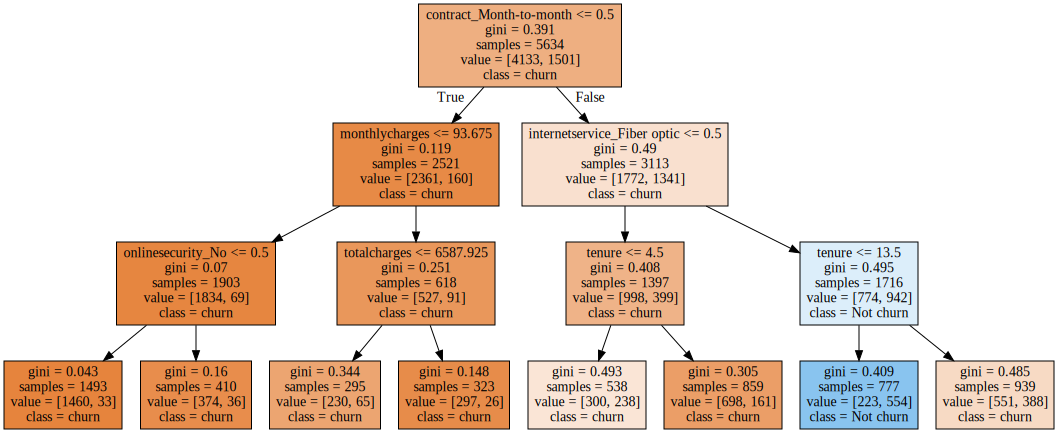

In [92]:


def plot_tree(tree, features, labels):
    graph = Source(export_graphviz(tree, feature_names=features, class_names=labels, filled = True))
    display(SVG(graph.pipe(format='svg')))


plot_tree(model_dt, x_train.columns, ['churn', 'Not churn'])

# Random Forest model

In [93]:
from sklearn.ensemble import RandomForestClassifier # Importing the algorithm

model_rf = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=1)
            
model_rf.fit(x_train, y_train)

y_test_pred_RandomForest = model_rf.predict(x_test)

output = pd.DataFrame({'New_customerid': psn_test, 'churm_what_actualy_happened':y_test, 'churm_predicted_by_model': y_test_pred_RandomForest})

In [94]:
feature_importances = model_rf.feature_importances_ 
feature_importances

array([0.00327923, 0.13454644, 0.04254361, 0.07762029, 0.00067214,
       0.00082771, 0.00479553, 0.00209537, 0.00236576, 0.00217029,
       0.00076749, 0.00074745, 0.00105052, 0.00102232, 0.00267229,
       0.0220598 , 0.06590351, 0.00716913, 0.08105999, 0.01246424,
       0.01565643, 0.02866417, 0.0053629 , 0.00868886, 0.01818115,
       0.0120184 , 0.00277474, 0.05057524, 0.00988449, 0.01677371,
       0.00189187, 0.00636055, 0.00252955, 0.00191467, 0.01144089,
       0.00178186, 0.18193083, 0.02636211, 0.06013583, 0.00655767,
       0.0052781 , 0.00168485, 0.00290704, 0.05334008, 0.00147092])

In [95]:
features = x_train.columns
stats = pd.DataFrame({'feature':features, 'importance':feature_importances})
stats.sort_values('importance', ascending=False)

,feature,importance
36,contract_Month-to-month,0.181931
1,tenure,0.134546
18,onlinesecurity_No,0.081060
3,totalcharges,0.077620
16,internetservice_Fiber optic,0.065904
38,contract_Two-year,0.060136
43,paymentmethod_Electronic-check,0.053340
27,techsupport_No,0.050575
2,monthlycharges,0.042544
21,onlinebackup_No,0.028664


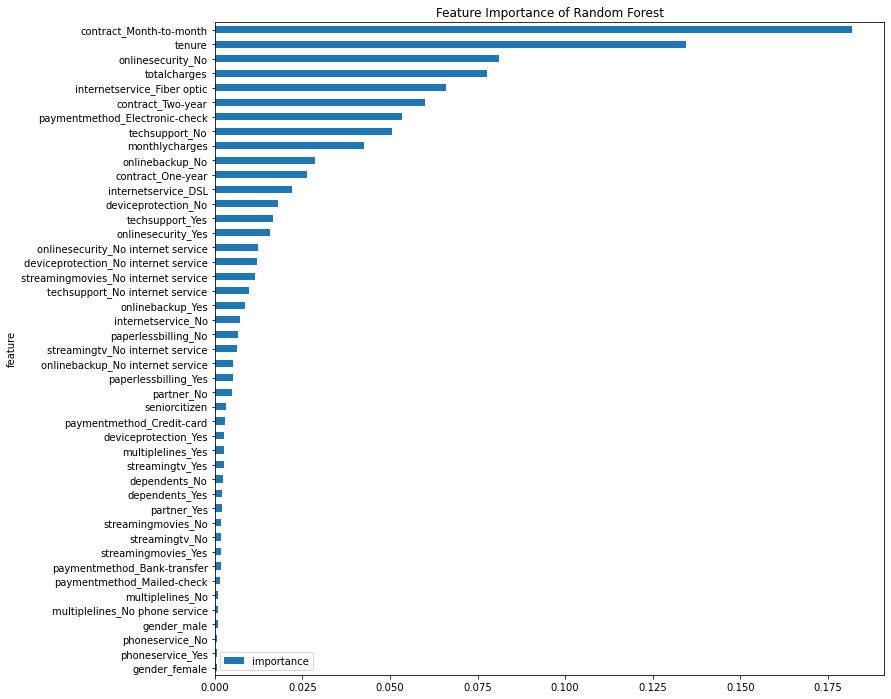

In [96]:
stats_sort = stats.sort_values('importance', ascending=True)
stats_sort.plot(y='importance', x='feature', kind='barh', figsize = (12,12))
plt.title('Feature Importance of Random Forest');

# KNN - K Nearest Neighbors

In [97]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=20)
        
model_knn.fit(x_train, y_train)

y_test_pred_Knn = model_knn.predict(x_test)

output = pd.DataFrame({'canceled_what_actualy_happened':y_test, 'canceled_predicted_by_model': y_test_pred_DecisionTree})
output.to_csv('my_Knn_Prediction.csv', index=False)

# Accuracy

In [98]:
from sklearn.metrics import accuracy_score

In [99]:
# Decision Tree
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc

0.7785663591199432

In [100]:
# Random Forest
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.7892122072391767

In [101]:
# Knn
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc

0.7778566359119943

# Overfitting

# Decision Tree

In [102]:
# Overfitting - Decision Tree - max_depth = 3
model_dt = DecisionTreeClassifier(max_depth=3)
model_dt.fit(x_train, y_train)
y_test_pred_DecisionTree = model_dt.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc

0.7785663591199432

In [103]:
# Overfitting - Decision Tree - max_depth = 5
model_dt = DecisionTreeClassifier(max_depth=3)
model_dt.fit(x_train, y_train)
y_test_pred_DecisionTree = model_dt.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc

0.7785663591199432

In [104]:
# Overfitting - Decision Tree - max_depth = 2
model_dt = DecisionTreeClassifier(max_depth=2)
model_dt.fit(x_train, y_train)
y_test_pred_DecisionTree = model_dt.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc

0.758694109297374

In [105]:
# Overfitting - Decision Tree - max_depth = 100
model_dt = DecisionTreeClassifier(max_depth=100)
model_dt.fit(x_train, y_train)
y_test_pred_DecisionTree = model_dt.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc

0.7260468417317246

In [106]:
# Conclusion: max_depth = 3 is the best value

# Random Forest

In [107]:
# Random Forest -- n_estimators = 100 & max_depth = 3 (like before)
model_rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=1)        
model_rf.fit(x_train, y_train)
y_test_pred_RandomForest = model_rf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.7735982966643009

In [108]:
# Random Forest -- n_estimators = 150 & max_depth = 5 (like before)
model_rf = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=1)        
model_rf.fit(x_train, y_train)
y_test_pred_RandomForest = model_rf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.7892122072391767

In [109]:
# Random Forest -- n_estimators = 90 & max_depth = 3 (like before)
model_rf = RandomForestClassifier(n_estimators=90, max_depth=3, random_state=1)        
model_rf.fit(x_train, y_train)
y_test_pred_RandomForest = model_rf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.7735982966643009

In [110]:
# Conclusion: n_estimators = 150 & max_depth = 5 - are best values

# Knn

In [111]:
# n_neighbors=3
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train, y_train)
y_test_pred_Knn = model_knn.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc

0.7416607523066004

In [112]:
# n_neighbors=40
model_knn = KNeighborsClassifier(n_neighbors=40)
model_knn.fit(x_train, y_train)
y_test_pred_Knn = model_knn.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc

0.7721788502484032

In [113]:
# n_neighbors=20
model_knn = KNeighborsClassifier(n_neighbors=20)
model_knn.fit(x_train, y_train)
y_test_pred_Knn = model_knn.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc

0.7778566359119943

In [114]:
# n_neighbors=10
model_knn = KNeighborsClassifier(n_neighbors=10)
model_knn.fit(x_train, y_train)
y_test_pred_Knn = model_knn.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc

0.7707594038325053

In [115]:
# Conclusion: n_neighbors=20 - the best value

In [116]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 

x_train_scaled = scaler.fit_transform(x_train) 
x_test_scaled = scaler.transform(x_test) 

model_knn = KNeighborsClassifier(n_neighbors=20)
model_knn.fit(x_train_scaled, y_train)

y_test_pred_Knn_Scaled = model_knn.predict(x_test_scaled)


output = pd.DataFrame({'passengerid': psn_test, 'survived_what_actualy_happened':y_test, 'survived_predicted_by_model': y_test_pred_Knn, 'survived_predicted_by_model_scaled':y_test_pred_Knn_Scaled}) # saving results to DataFrame
output.to_csv('my_Knn_Prediction_scaled.csv', index=False) 


test_acc = accuracy_score(y_test, y_test_pred_Knn_Scaled)
test_acc

0.7885024840312278

In [117]:
# Conclusion: Algorithm "Random Forest" have the best accuracy

# Benchmark

In [118]:
import numpy as np

def get_benchmark_predictions(x, benchmark_value):
    return np.ones(len(x))*benchmark_value

benchmark_value = 0

y_test_pred_Benchmark = get_benchmark_predictions(x_test, benchmark_value)
y_test_pred_Benchmark

array([0., 0., 0., ..., 0., 0., 0.])

In [119]:
y_test_pred_Benchmark.size

1409

In [120]:
test_acc = accuracy_score(y_test, y_test_pred_Benchmark)
test_acc

0.7388218594748048

In [121]:
# Conclusion: The test's performance is 74%. The performance of "Rendom Forest" lgorithm is 79%, better then benchmark